In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import color
from skimage import io
from scipy.ndimage import  rotate
import scipy.fftpack as fft 

Get image data

In [2]:
imgi = io.imread('Test3.png')[:,:,:3]
imgg = color.rgb2gray(imgi)

Define functions

In [3]:
#define radon transformation whitch rotates the image and calculates the sum over each line which is saved in a Sinogramm
def radon_trans(img):
    imgp = img
    a,b=np.array(imgp).shape
    size = [a if a>b else b][0]
    sino = np.zeros((180,size))
    for i in range(0,180):
        imgr = rotate(imgp,i,reshape=False)
        sino[i] = sum(np.array(imgr))
    return sino

#define invers radon transformation which summs up all backprojections saved in the Sinogramm to rebuilt the initial Image
def inv_radon_trans(img):
    a,b = np.array(img).shape
    size = [a if a>b else b][0]
    newimg = np.zeros((size,size))
    for i in range(0,180):
        line = np.tile(img[i],(size,1))
        line = rotate(line,i,reshape=False)
        newimg += line
    return newimg

#define normal and inverse fouriertransformation
def fourier(img):
    return fft.rfft(x=img, axis=1)

def inv_fourier(img):
    return fft.irfft(x=img, axis=1)

#define ramp filter to multiply withe the fouriertransformatet sinogramm
def ramp(img):
    a,b = np.array(img).shape
    size = [a if a>b else b][0]
    ramp = np.floor(np.arange(0, size,1))
    return np.multiply(img,np.tile(ramp,(180,1)))



Creating a Sinogramm from the Original Image and reconstructing it without any filtering

In [4]:
plt.figure(figsize = (20,15))
sinogramm = radon_trans(imgg)

recon = inv_radon_trans(sinogramm)

<Figure size 1440x1080 with 0 Axes>

Applying a rampfilter to the sinogramm as a highpass and reconstruct the filtered Image

In [5]:
fouriertrans = fourier(sinogramm)
filtering = ramp(fouriertrans)
filtered_sino = inv_fourier(filtering)
filtered_recon = inv_radon_trans(filtered_sino)

Plot the Results

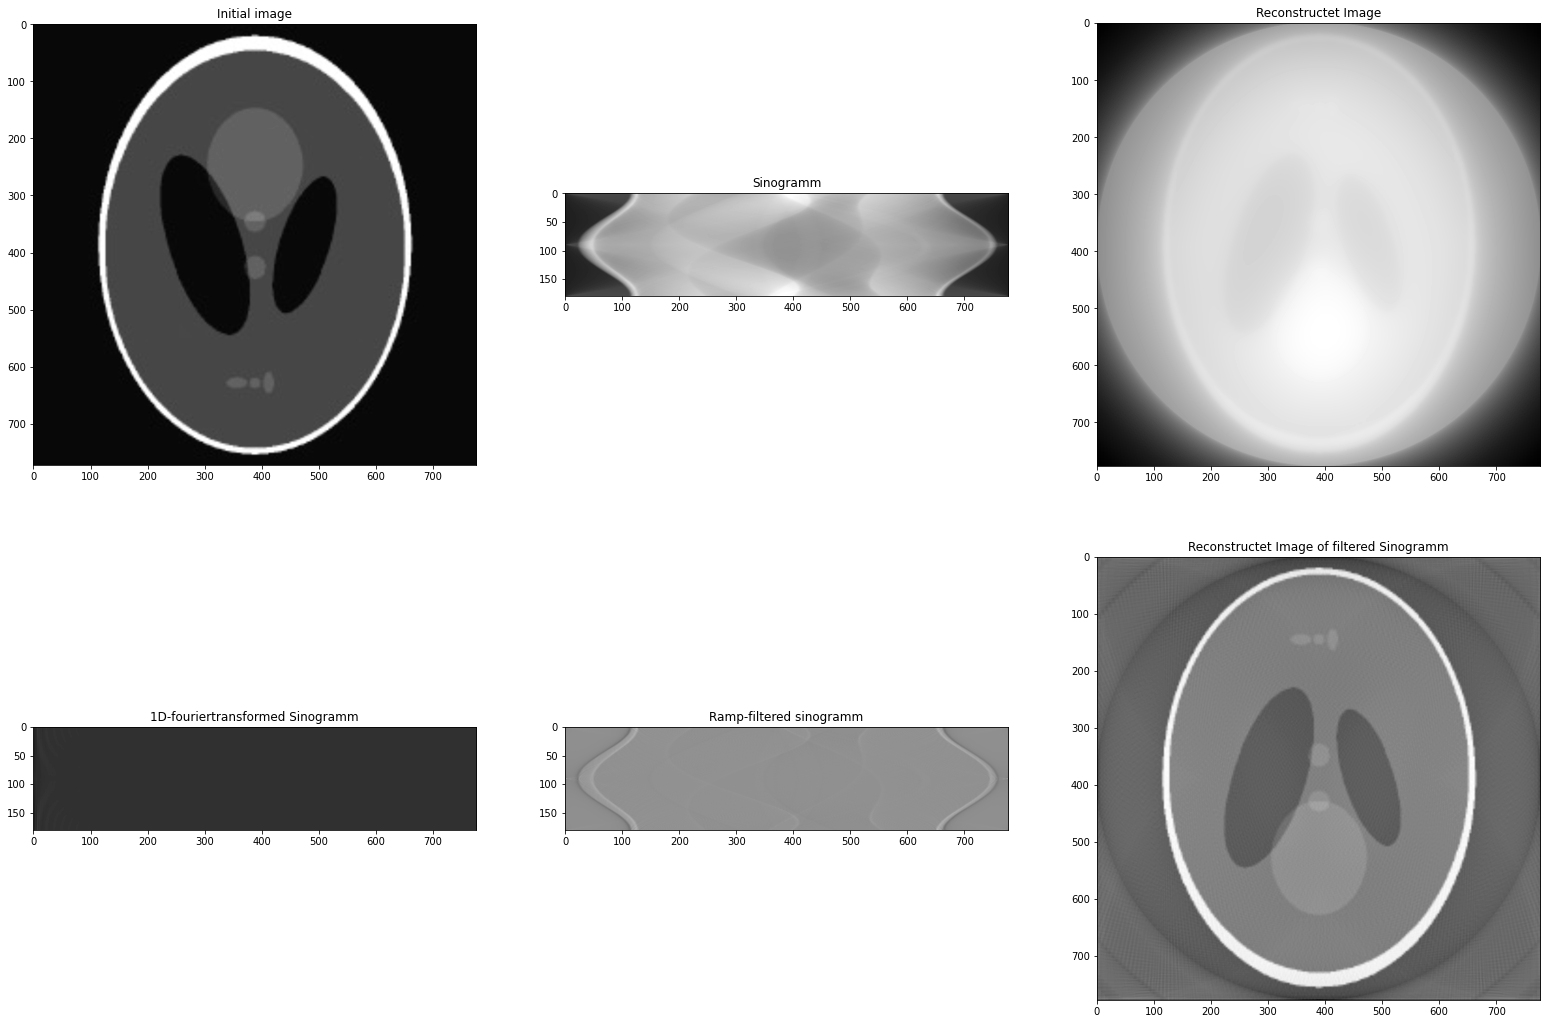

In [6]:
plt.figure(figsize = (27,18))

plt.subplot(231)
plt.title('Initial image')
plt.imshow(imgg, cmap = "gray")

plt.subplot(232)
plt.title('Sinogramm')
plt.imshow(sinogramm, cmap = "gray")

plt.subplot(233)
plt.title('Reconstructet Image')
plt.imshow(recon, cmap = "gray")

plt.subplot(234)
plt.title('1D-fouriertransformed Sinogramm')
plt.imshow(fouriertrans, cmap = "gray")

plt.subplot(235)
plt.title('Ramp-filtered sinogramm')
plt.imshow(filtered_sino, cmap = "gray")

plt.subplot(236)
plt.title('Reconstructet Image of filtered Sinogramm')
plt.imshow(filtered_recon, cmap = "gray")